# LMC BFE computation

1. Load LMC particles.
2. Center the particles in the LMC COM and center the velocities as well.
3. Compute the BFE.
4. Compute the Energies. Potential and Kinematic.
5. Select bound particles.
6. Iterate from 3-5 untill convergence on the number of bound particles.
7. Use the bound particles to compute the BFE using the bootstrap method and S/N cut.


In [3]:
%pylab inline
import biff
import coefficients_smoothing
import reading_snapshots
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [5]:
G_gadget=43007.1

# 1. Load LMC particles

In [6]:
mwlmc_pos = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pos','dm')
mwlmc_vel = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'vel','dm')


Returning DM    Positions
Returning DM    Velocities


In [7]:
mwlmc_ids = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pid','dm')

Returning DM    Particle IDs


In [8]:
mwlmc_ids = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pid','dm')

Returning DM    Particle IDs


In [9]:
mwlmc_pot = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'pot','dm')

Returning DM    Potential


In [10]:
mwlmc_mass = pygadgetreader.readsnap('../data/MWLMC5_100M_new_b1_110', 'mass','dm')

Returning DM    Mass


In [20]:
mwlmc_mass[100000200]

1.1996922e-06

In [104]:
pos_lmc, vel_lmc, ids_lmc, pot_lmc = reading_snapshots.sat_particles(mwlmc_pos, 
                                                                     mwlmc_vel, 
                                                                     mwlmc_ids,
                                                                     mwlmc_pot,
                                                                     100000000)

### random sample of the LMC halo 

In [13]:
rand_particles=random_1e6_partiles=np.random.randint(0, len(ids_lmc), 1000000)
rand_particles_test=random_1e4_partiles=np.random.randint(0, len(ids_lmc), 10000)

In [24]:
lmc_pmass_all = 1.1996922e-06
LMC_mass = np.sum(np.ones(15000000)*lmc_pmass_all)
LMC_pmass = LMC_mass/1E6
print(LMC_mass, LMC_pmass)

17.995382999999403 1.7995382999999404e-05


In [25]:
LMC_mass = np.sum(np.ones(15000000)*lmc_pmass_all)
LMC_pmass_test = LMC_mass/1E4
LMC_pmass_test

0.0017995382999999403

# 2 .LMC com coordinates

In [12]:
reading_snapshots.com_shrinking_sphere(pos_lmc[rand_particles], vel_lmc[rand_particles], np.ones(1000000)*LMC_pmass)

0.80895257


(array([  7.50157014,   0.75741018, -31.2676951 ]),
 array([ -42.53890866, -229.72099788,  184.89367853]))

In [26]:
xlmc_com = 7.50157014
ylmc_com = 0.75741018
zlmc_com = -31.2676951

vxlmc_com = -42.53890866
vylmc_com = -229.72099788
vzlmc_com = 184.89367853


### center LMC on COM and write snapshot.

In [27]:
lmc_array = np.array([pos_lmc[rand_particles,0]-xlmc_com, pos_lmc[rand_particles,1]-ylmc_com,
                     pos_lmc[rand_particles,2]-zlmc_com, vel_lmc[rand_particles,0]-vxlmc_com,
                     vel_lmc[rand_particles,1]-vylmc_com, vel_lmc[rand_particles,2]-vzlmc_com,
                     np.ones(1000000)*LMC_pmass]).T

In [52]:
lmc_array_test = np.array([pos_lmc[rand_particles_test,0]-xlmc_com, pos_lmc[rand_particles_test,1]-ylmc_com,
                     pos_lmc[rand_particles_test,2]-zlmc_com, vel_lmc[rand_particles_test,0]-vxlmc_com,
                     vel_lmc[rand_particles_test,1]-vylmc_com, vel_lmc[rand_particles_test,2]-vzlmc_com,
                     np.ones(10000)*LMC_pmass_test]).T

In [50]:
np.savetxt('lmc_1e6_rand_particles.txt', lmc_array)

In [53]:
np.savetxt('lmc_1e4_rand_particles.txt', lmc_array_test)

In [29]:
pos_lmc_com = np.array([pos_lmc[rand_particles,0]-xlmc_com, 
                        pos_lmc[rand_particles,1]-ylmc_com,
                        pos_lmc[rand_particles,2]-zlmc_com]).T

(-100, 100)

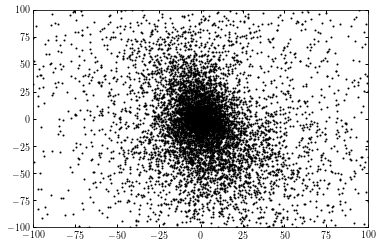

In [15]:
scatter(pos_lmc_com[10000:20000,0], pos_lmc_com[10000:20000,2], s=1, c='k')
xlim(-100, 100)
ylim(-100, 100)

#3. Compute the SCF coefficients and potential

In [30]:
S, T = biff.compute_coeffs_discrete(np.ascontiguousarray(pos_lmc_com).astype(float),
                                    np.ones(1000000)*LMC_pmass, 20, 20, 10)

In [31]:
LMC_potential = biff.potential(np.ascontiguousarray(pos_lmc_com).astype(float), S, T, M=1, r_s=10, G=G_gadget)

# 4. Computing energies: 

In [32]:
vel_lmc_com = np.array([vel_lmc[rand_particles,0]-vxlmc_com, 
                        vel_lmc[rand_particles,1]-vylmc_com,
                        vel_lmc[rand_particles,2]-vzlmc_com]).T

In [33]:
vmag_lmc = np.sqrt(vel_lmc_com[:,0]**2 + vel_lmc_com[:,1]**2 + vel_lmc_com[:,2]**2) 
dist_lmc = np.sqrt(pos_lmc_com[:,0]**2 + pos_lmc_com[:,1]**2 + pos_lmc_com[:,2]**2) 

In [34]:
T = vmag_lmc**2/2
V = LMC_potential

### selecting bound and unbound particles

In [35]:
lmc_bound = np.where(T+V/2.<=0)[0]
lmc_unbound = np.where(T+V/2.>=0)[0]

lmc_bound2 = np.where(T+V<=0)[0]
lmc_unbound2 = np.where(T+V>=0)[0]

lmc_bound3 = np.where(T+2*V<=0)[0]
lmc_unbound3 = np.where(T+2*V>=0)[0]

lmc_bound4 = np.where(T+3*V<=0)[0]
lmc_unbound4 = np.where(T+3*V>=0)[0]

lmc_bound5 = np.where(T+4*V<=0)[0]
lmc_unbound5 = np.where(T+4*V>=0)[0]

lmc_bound6 = np.where(T+5*V<=0)[0]
lmc_unbound6 = np.where(T+5*V>=0)[0]

lmc_bound7 = np.where(T+6*V<=0)[0]
lmc_unbound7 = np.where(T+6*V>=0)[0]

lmc_bound8 = np.where(T+7*V<=0)[0]
lmc_unbound8 = np.where(T+7*V>=0)[0]


In [36]:
print(len(lmc_bound), len(lmc_unbound))
print(len(lmc_bound2), len(lmc_unbound2))
print(len(lmc_bound3), len(lmc_unbound3))
print(len(lmc_bound4), len(lmc_unbound4))
print(len(lmc_bound5), len(lmc_unbound5))
print(len(lmc_bound6), len(lmc_unbound6))
print(len(lmc_bound7), len(lmc_unbound7))
print(len(lmc_bound8), len(lmc_unbound8))

310635 689365
434923 565077
546608 453392
608050 391950
650110 349890
682311 317689
708242 291758
729379 270621


In [37]:
print(np.max(dist_lmc[lmc_bound]))
print(np.max(dist_lmc[lmc_bound2]))
print(np.max(dist_lmc[lmc_bound3]))
print(np.max(dist_lmc[lmc_bound4]))
print(np.max(dist_lmc[lmc_bound5]))
print(np.max(dist_lmc[lmc_bound6]))
print(np.max(dist_lmc[lmc_bound7]))
print(np.max(dist_lmc[lmc_bound8]))

130.58957
154.72699
194.99585
205.40076
226.15266
238.82274
263.28598
277.34634


(-1, 5)

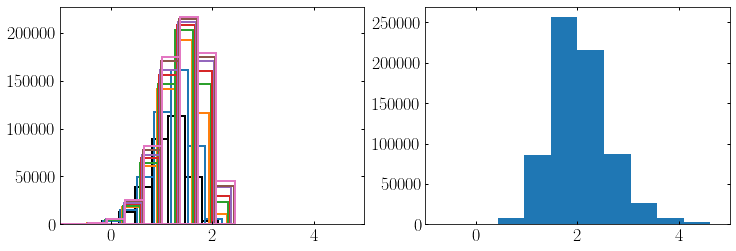

In [38]:
figure(figsize=(12, 4))
subplot(1, 2, 1)
hist(np.log10(dist_lmc[lmc_bound]), fill=False, lw=2)
hist(np.log10(dist_lmc[lmc_bound2]), fill=False, edgecolor='C0', lw=2)
hist(np.log10(dist_lmc[lmc_bound3]), fill=False, edgecolor='C1', lw=2)
hist(np.log10(dist_lmc[lmc_bound4]), fill=False, edgecolor='C2', lw=2)
hist(np.log10(dist_lmc[lmc_bound5]), fill=False, edgecolor='C3', lw=2)
hist(np.log10(dist_lmc[lmc_bound6]), fill=False, edgecolor='C4', lw=2)
hist(np.log10(dist_lmc[lmc_bound7]), fill=False, edgecolor='C5', lw=2)
hist(np.log10(dist_lmc[lmc_bound8]), fill=False, edgecolor='C6', lw=2)

xlim(-1, 5)
subplot(1, 2, 2)
hist(np.log10(dist_lmc[lmc_unbound]))
xlim(-1, 5)


(-200, 200)

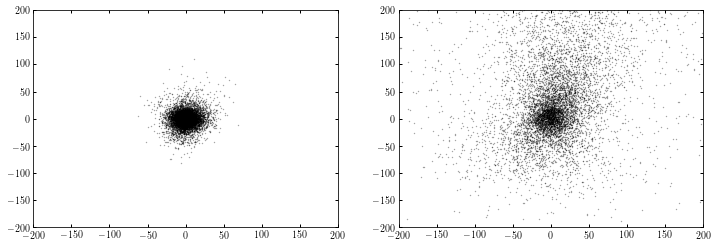

In [37]:
figure(figsize=(12, 4))
subplot(1, 2, 1)
scatter(pos_lmc_com[lmc_bound][0:10000,0], pos_lmc_com[lmc_bound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)

subplot(1, 2, 2)
scatter(pos_lmc_com[lmc_unbound][0:10000,0], pos_lmc_com[lmc_unbound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)

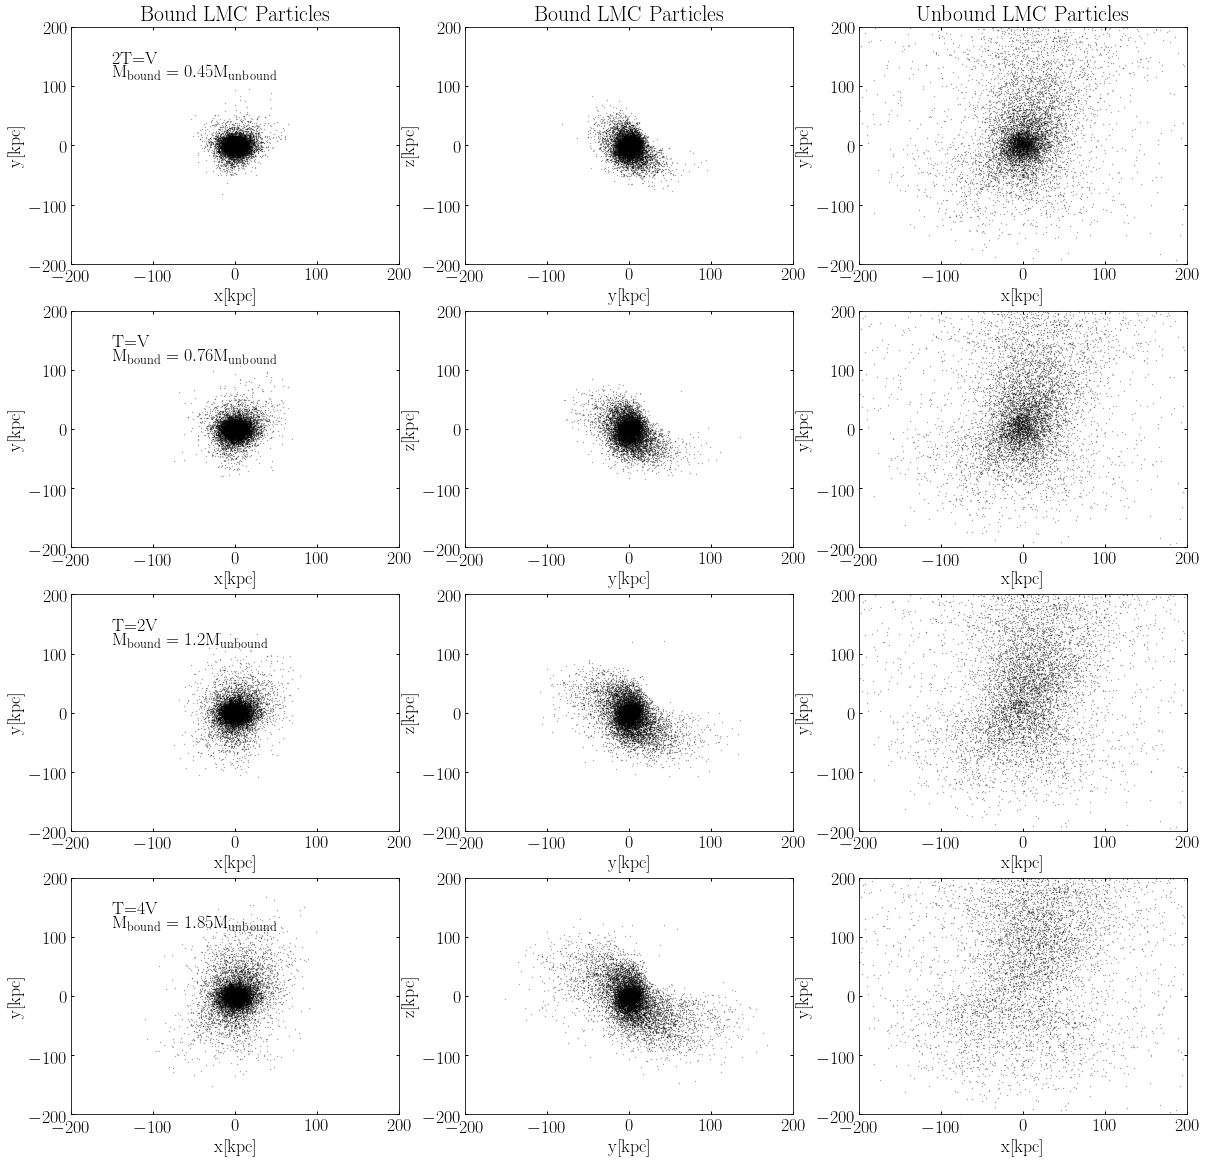

In [41]:
figure(figsize=(20, 20))
subplot(4, 3, 1)
title('Bound LMC Particles')
scatter(pos_lmc_com[lmc_bound][0:10000,0], pos_lmc_com[lmc_bound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, '2T=V')
text(-150, 110, r'$\rm{M_{bound}}=0.45 \rm{M_{unbound}}$')

subplot(4, 3, 2)
title('Bound LMC Particles')
scatter(pos_lmc_com[lmc_bound][0:10000,1], pos_lmc_com[lmc_bound][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')


subplot(4, 3, 3)
title('Unbound LMC Particles')

scatter(pos_lmc_com[lmc_unbound][0:10000,0], pos_lmc_com[lmc_unbound][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')

subplot(4, 3, 4)
scatter(pos_lmc_com[lmc_bound2][0:10000,0], pos_lmc_com[lmc_bound2][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, 'T=V')
text(-150, 110, r'$\rm{M_{bound}}=0.76 \rm{M_{unbound}}$')

subplot(4, 3, 5)
scatter(pos_lmc_com[lmc_bound2][0:10000,1], pos_lmc_com[lmc_bound2][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')


subplot(4, 3, 6)
scatter(pos_lmc_com[lmc_unbound2][0:10000,0], pos_lmc_com[lmc_unbound2][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')

subplot(4, 3, 7)
scatter(pos_lmc_com[lmc_bound3][0:10000,0], pos_lmc_com[lmc_bound3][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, 'T=2V')
text(-150, 110, r'$\rm{M_{bound}}=1.2 \rm{M_{unbound}}$')

subplot(4, 3, 8)
scatter(pos_lmc_com[lmc_bound3][0:10000,1], pos_lmc_com[lmc_bound3][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')

subplot(4, 3, 9)
scatter(pos_lmc_com[lmc_unbound3][0:10000,0], pos_lmc_com[lmc_unbound3][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')


subplot(4, 3, 10)
scatter(pos_lmc_com[lmc_bound5][0:10000,0], pos_lmc_com[lmc_bound5][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')
text(-150, 140, 'T=4V')
text(-150, 110, r'$\rm{M_{bound}}=1.85 \rm{M_{unbound}}$')

subplot(4, 3, 11)
scatter(pos_lmc_com[lmc_bound5][0:10000,1], pos_lmc_com[lmc_bound5][0:10000,2], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('y[kpc]')
ylabel('z[kpc]')

subplot(4, 3, 12)
scatter(pos_lmc_com[lmc_unbound5][0:10000,0], pos_lmc_com[lmc_unbound5][0:10000,1], c='k', s=0.1, alpha=0.5)
xlim(-200, 200)
ylim(-200, 200)
xlabel('x[kpc]')
ylabel('y[kpc]')


savefig('LMC_bound_particles.png', bbox_inches='tight')

In [39]:
## Fraction of mass of the bound and unbound partiles:

print((len(lmc_bound)/len(lmc_unbound)))
print((len(lmc_bound2)/len(lmc_unbound2)))
print((len(lmc_bound3)/len(lmc_unbound3)))
print((len(lmc_bound5)/len(lmc_unbound5)))

0.45061034430236524
0.7696703281145756
1.2055969227511734
1.8580410986309983


Discusion:
    
    1. Pick T=V case and compute the BFE for the LMC bound particles.
    2. Compute the BFE for the MW without LMC particles.
    3. COmpute the BFE for the MW including the unbound LMC particles.
    4. Do I need to iterate to pick the LMC bound particles?
    5. Excess of DM from MW particles bounded to the LMC?
    

Next steps:
    0. Compute bound particles for the LMC with all the particles. (in progress)
    1. Write snapshot with LMC bound particles. (put the right mass of the particles if doing sample)
    2. Write snapshot with LMC unbound particles. (put the right mass of the particles if doing sample)
    4. Combine LMC unbound particles with MW particles. With different levels of energy
    5. Compute BFE with LMC bounded particles. 
    6. Compute BFE of the MW witn unbound particles.
    7. How much mass from the MW is bounded to the LMC?

In [128]:
# 0 

pos_lmc_com_all = np.array([pos_lmc[:,0]-xlmc_com, 
                            pos_lmc[:,1]-ylmc_com,
                            pos_lmc[:,2]-zlmc_com]).T

vel_lmc_com_all = np.array([vel_lmc[:,0]-vxlmc_com, 
                            vel_lmc[:,1]-vylmc_com,
                            vel_lmc[:,2]-vzlmc_com]).T




In [43]:
S_all, T_all = biff.compute_coeffs_discrete(np.ascontiguousarray(pos_lmc_com_all).astype(float),
                                            np.ones(15000000)*lmc_pmass_all, 20, 20, 10)

In [44]:
LMC_potential_all = biff.potential(np.ascontiguousarray(pos_lmc_com_all).astype(float), S_all, T_all, M=1, r_s=10, G=G_gadget)

In [106]:
vmag_lmc_all = np.sqrt(vel_lmc_com_all[:,0]**2 + vel_lmc_com_all[:,1]**2 + vel_lmc_com_all[:,2]**2) 
dist_lmc_all = np.sqrt(pos_lmc_com_all[:,0]**2 + pos_lmc_com_all[:,1]**2 + pos_lmc_com_all[:,2]**2) 

In [124]:
pos_lmc_com_all[10000000]

array([  86.99271,  116.22519, -121.07076], dtype=float32)

In [112]:
sum(15000000*lmc_pmass_all)

17.995383

In [108]:
T_all = vmag_lmc_all**2/2
V_all = LMC_potential_all

In [142]:
lmc_bound_all = np.where((T_all+V_all/2.)<=0)[0]
lmc_unbound_all = np.where((T_all+V_all/2.)>=0)[0]

lmc_bound2_all = np.where(T_all+V_all<=0)[0]
lmc_unbound2_all = np.where(T_all+V_all>=0)[0]

lmc_bound3_all = np.where(T_all+2*V_all<=0)[0]
lmc_unbound3_all = np.where(T_all+2*V_all>=0)[0]

lmc_bound4_all = np.where(T_all+4*V_all<=0)[0]
lmc_unbound4_all = np.where(T_all+4*V_all>=0)[0]




In [201]:
print(np.max(dist_lmc_all[lmc_unbound_all]))
print(np.max(dist_lmc_all[lmc_unbound2_all]))
print(np.max(dist_lmc_all[lmc_unbound3_all]))
print(np.max(dist_lmc_all[lmc_unbound4_all]))



41638.316
41638.316
41638.316
41638.316


In [169]:
np.savetxt('../data/LMC/LMC_15M_bound_T_4V.txt', np.array([pos_lmc_com_all[lmc_bound4_all,0], pos_lmc_com_all[lmc_bound4_all,1], pos_lmc_com_all[lmc_bound4_all,2],
                                                      vel_lmc_com_all[lmc_bound4_all,0], vel_lmc_com_all[lmc_bound4_all,1], vel_lmc_com_all[lmc_bound4_all,2],
                                                      np.ones(len(lmc_bound4_all))*lmc_pmass_all]).T)

In [170]:
np.savetxt('../data/LMC/LMC_15M_unbound_T_4V.txt', np.array([pos_lmc_com_all[lmc_unbound4_all,0], pos_lmc_com_all[lmc_unbound4_all,1], pos_lmc_com_all[lmc_unbound4_all,2],
                                                      vel_lmc_com_all[lmc_unbound4_all,0], vel_lmc_com_all[lmc_unbound4_all,1], vel_lmc_com_all[lmc_unbound4_all,2],
                                                      np.ones(len(lmc_unbound4_all))*lmc_pmass_all]).T)

In [162]:
print(len(lmc_bound_all))
print(len(lmc_bound2_all))
print(len(lmc_bound3_all))
print(len(lmc_bound4_all))

4655718
6529995
8204117
9760948


In [183]:
random_part_bound1 = np.random.randint(0, len(lmc_bound_all), 1000000)
random_part_bound2 = np.random.randint(0, len(lmc_bound2_all), 1000000)
random_part_bound3 = np.random.randint(0, len(lmc_bound3_all), 1000000)
random_part_bound4 = np.random.randint(0, len(lmc_bound4_all), 1000000)

In [196]:
lmc_part_bound_lr1 = (len(lmc_bound_all))/1E6*lmc_pmass_all
lmc_part_bound_lr2 = (len(lmc_bound2_all))/1E6*lmc_pmass_all
lmc_part_bound_lr3 = (len(lmc_bound3_all))/1E6*lmc_pmass_all
lmc_part_bound_lr4 = (len(lmc_bound4_all))/1E6*lmc_pmass_all

print(lmc_part_bound_lr1)
print(lmc_part_bound_lr2)
print(lmc_part_bound_lr3)
print(lmc_part_bound_lr4)

5.5854285699996e-06
7.833984067539e-06
9.8424151727874e-06
1.17101331802056e-05


In [195]:
lmc_pmass_all

1.1996922e-06

In [200]:
np.savetxt('../data/LMC/LMC_1M_bound_T_4V.txt', np.array([pos_lmc_com_all[lmc_bound4_all,0][random_part_bound4], 
                                                          pos_lmc_com_all[lmc_bound4_all,1][random_part_bound4], 
                                                          pos_lmc_com_all[lmc_bound4_all,2][random_part_bound4],
                                                          vel_lmc_com_all[lmc_bound4_all,0][random_part_bound4], 
                                                          vel_lmc_com_all[lmc_bound4_all,1][random_part_bound4], 
                                                          vel_lmc_com_all[lmc_bound4_all,2][random_part_bound4],
                                                          np.ones(len(random_part_bound4))*lmc_part_bound_lr4]).T)

In [ ]:
lmc_part_bound_lr1 = (len(lmc_bound_all))/1E6*lmc_pmass_all
lmc_part_bound_lr2 = (len(lmc_bound2_all))/1E6*lmc_pmass_all
lmc_part_bound_lr3 = (len(lmc_bound3_all))/1E6*lmc_pmass_all
lmc_part_bound_lr4 = (len(lmc_bound4_all))/1E6*lmc_pmass_all

print(lmc_part_bound_lr1)
print(lmc_part_bound_lr2)
print(lmc_part_bound_lr3)
print(lmc_part_bound_lr4)

In [184]:
random_plot = np.random.randint(0, 1E6, 10000)

(-100, 100)

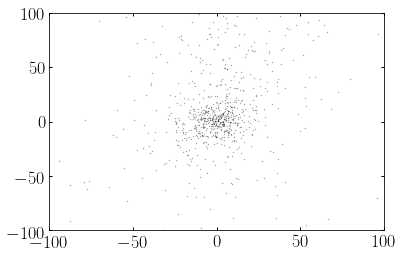

In [133]:
scatter(pos_lmc_com_all[random_plot,0], pos_lmc_com_all[random_plot,1], c='k', s=0.1, alpha=0.5)
xlim(-100, 100)
ylim(-100, 100)

(-60, 60)

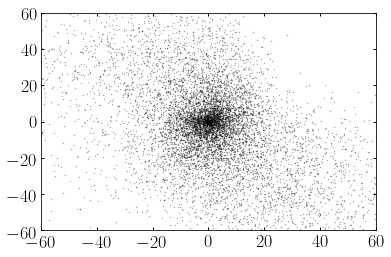

In [191]:
scatter(pos_lmc_com_all[lmc_bound4_all][random_part_bound4][random_plot,1], pos_lmc_com_all[lmc_bound4_all][random_part_bound4][random_plot,2], c='k', s=0.1, alpha=0.5)
xlim(-60, 60)
ylim(-60, 60)

(-60, 60)

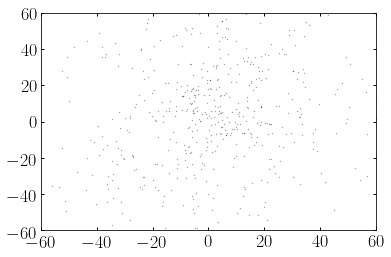

In [139]:
scatter(pos_lmc_com_all[lmc_unbound_all][random_plot,0], pos_lmc_com_all[lmc_unbound_all][random_plot,1], c='k', s=0.1, alpha=0.5)
xlim(-60, 60)
ylim(-60, 60)